In [6]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Matplotlib is building the font cache; this may take a moment.


In [7]:
data = pd.read_csv('Datathon_1_Dataset_2.csv')
data.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23535 entries, 0 to 23534
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  23535 non-null  int64  
 1   Gender               23535 non-null  object 
 2   Calorie_Intake       23535 non-null  int64  
 3   Sugar_Intake         23535 non-null  int64  
 4   Physical_Activity    23535 non-null  int64  
 5   Fast_Food_Frequency  23535 non-null  int64  
 6   Screen_Time          23535 non-null  int64  
 7   Height               23535 non-null  float64
 8   Weight               23535 non-null  float64
 9   BMI                  23535 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 1.8+ MB


In [9]:
data.describe()

,Age,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
count,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000,23535.000000
mean,48.532993,2495.845634,64.824559,89.496707,2.018441,5.486127,1.650279,70.019142,26.127641
std,17.872736,577.798752,32.004657,52.120810,1.414634,3.454036,0.119714,15.016866,6.875510
min,18.000000,1500.000000,10.000000,0.000000,0.000000,0.000000,1.196086,10.010016,3.442184
25%,33.000000,1991.000000,37.000000,45.000000,1.000000,2.000000,1.569815,59.859242,21.337576
50%,48.000000,2495.000000,65.000000,90.000000,2.000000,6.000000,1.650122,70.022501,25.661507
75%,64.000000,2994.000000,93.000000,135.000000,3.000000,8.000000,1.731470,80.038009,30.329032
max,79.000000,3499.000000,119.000000,179.000000,4.000000,11.000000,2.154243,126.493504,70.475419


In [10]:
# detect Nan values
data.isnull().sum()

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64

In [11]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

X = data[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time']]

bmi = data['BMI']
y = (bmi > np.median(bmi)).astype(int)

np.int64(11767)

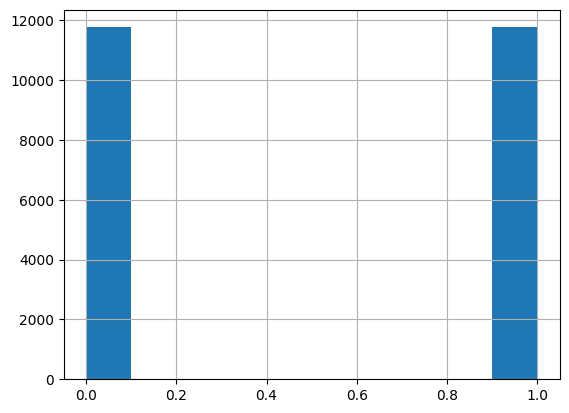

In [12]:
y.hist()
y.sum()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
np.sum(y_test) / len(y_test)

np.float64(0.4969194816231145)

In [17]:
acc_results = {}

for k in list(range(1, 13, 2)) + [len(X_train)//2 - 1, len(X_train)-1]:
    acc_results[k] = {}
    for distance_metric in ['euclidean', 'manhattan', 'minkowski']:
        acc_results[k][distance_metric] = {}
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        if distance_metric == 'minkowski':
            knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric, p=10)
            
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test)

        test_acc = accuracy_score(y_test, y_test_pred)
        acc_results[k][distance_metric] = {'test_acc': test_acc}
        
        print(f'K={k}, Metric={distance_metric}')
        print(confusion_matrix(y_test, y_test_pred))
        print(classification_report(y_test, y_test_pred))

K=1, Metric=euclidean
[[1204 1164]
 [1178 1161]]
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      2368
           1       0.50      0.50      0.50      2339

    accuracy                           0.50      4707
   macro avg       0.50      0.50      0.50      4707
weighted avg       0.50      0.50      0.50      4707

K=1, Metric=manhattan
[[1212 1156]
 [1195 1144]]
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      2368
           1       0.50      0.49      0.49      2339

    accuracy                           0.50      4707
   macro avg       0.50      0.50      0.50      4707
weighted avg       0.50      0.50      0.50      4707

K=1, Metric=minkowski
[[1222 1146]
 [1183 1156]]
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      2368
           1       0.50      0.49      0.50      2339

    accuracy                       

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


K=18827, Metric=manhattan
[[   0 2368]
 [   0 2339]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2368
           1       0.50      1.00      0.66      2339

    accuracy                           0.50      4707
   macro avg       0.25      0.50      0.33      4707
weighted avg       0.25      0.50      0.33      4707



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


K=18827, Metric=minkowski
[[   0 2368]
 [   0 2339]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2368
           1       0.50      1.00      0.66      2339

    accuracy                           0.50      4707
   macro avg       0.25      0.50      0.33      4707
weighted avg       0.25      0.50      0.33      4707



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [18]:
with open('knn_acc_results.json', 'w') as f:
    f.write(json.dumps(acc_results))
    f.close()

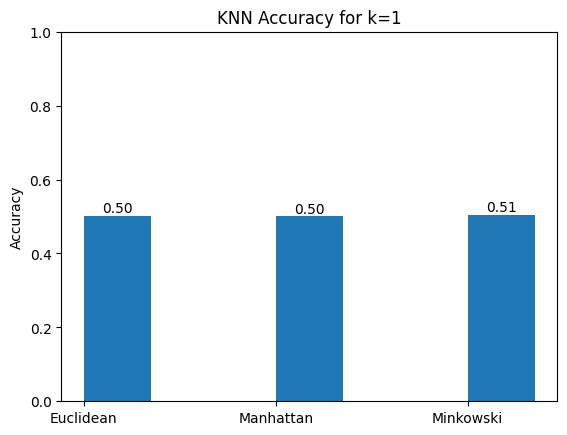

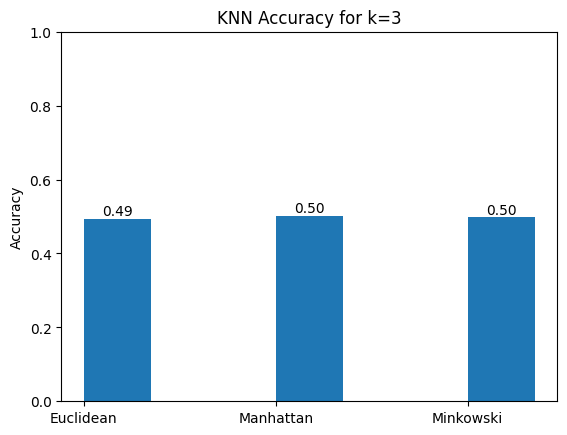

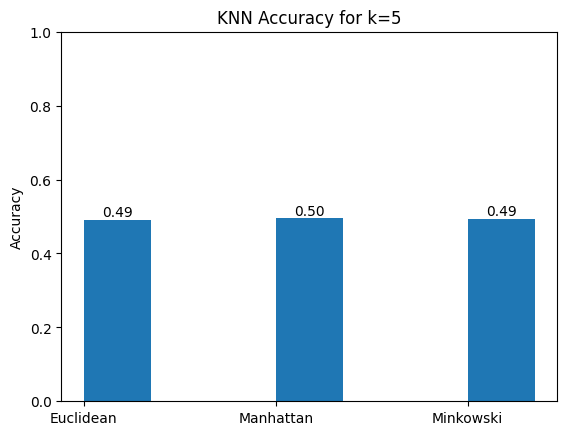

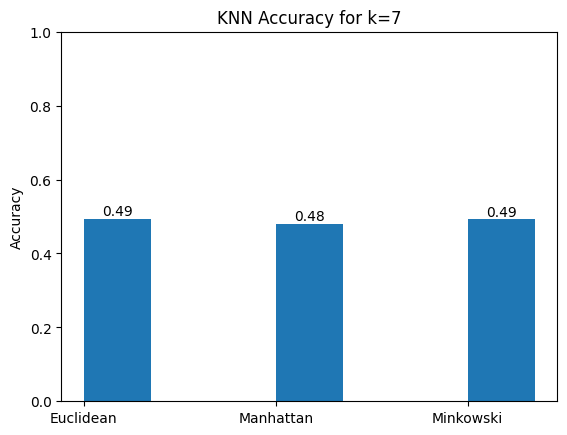

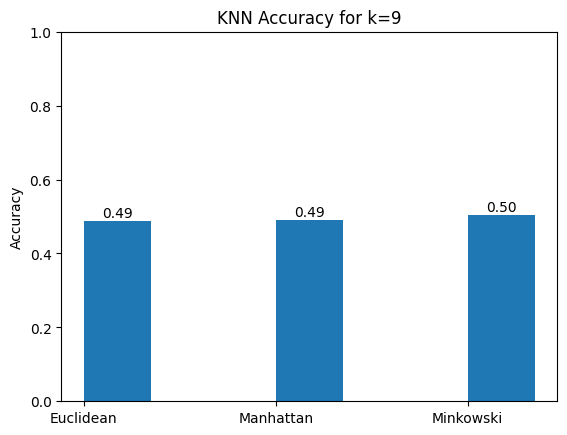

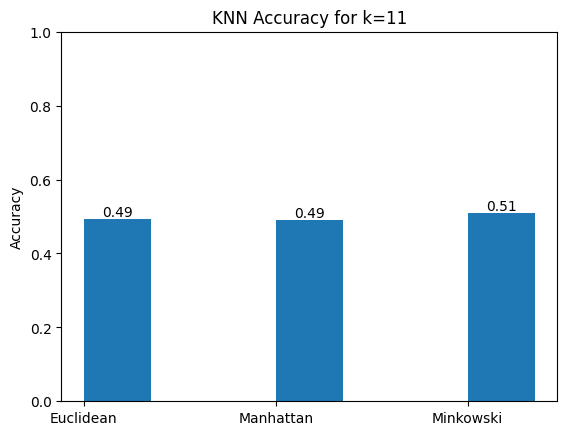

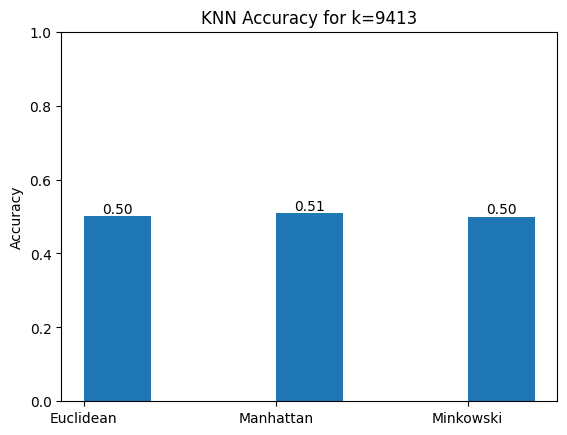

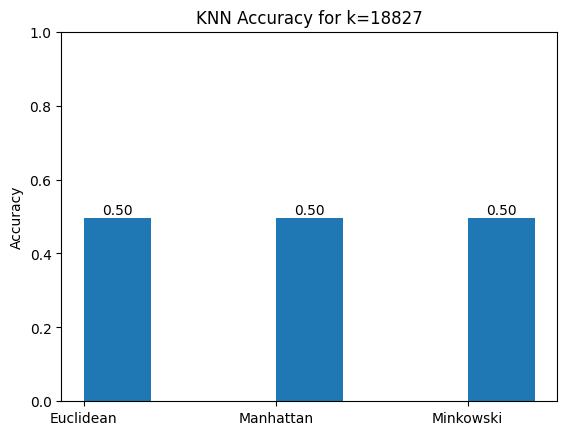

In [19]:
# plot hist of train and test accuracy for different k and distance metrics
# plot train and test hist next to each other separately for each k
# show the nums with 2 decimal points on top of each bar

import matplotlib.pyplot as plt

# Plotting the results
for k in acc_results.keys():
    # train_acc = [acc_results[k][metric]['train_acc'] for metric in ['euclidean', 'manhattan', 'minkowski']]
    test_acc = [acc_results[k][metric]['test_acc'] for metric in ['euclidean', 'manhattan', 'minkowski']]

    x = np.arange(len(test_acc))
    width = 0.35
    fig, ax = plt.subplots()
    bars1 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy')

    ax.set_ylabel('Accuracy')
    ax.set_title(f'KNN Accuracy for k={k}')
    ax.set_xticks(x)
    ax.set_xticklabels(['Euclidean', 'Manhattan', 'Minkowski'])
    # ax.legend(loc='best')

    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    plt.ylim(0, 1)
    plt.show()